### Crawl 100 players for applying K-means algorithm

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from time import sleep
import csv

In [13]:
chrome_options = Options()
driver = webdriver.Chrome(options=chrome_options)
chrome_options.add_argument("--headless")
driver.get("https://www.fifaratings.com/players")
sleep(2)

indexs_to_skip = [10, 21, 32, 43, 54, 65, 76, 87, 98]
source = BeautifulSoup(driver.page_source, "html.parser")
table = source.find("table",class_="table table-striped table-sm table-hover mb-0").find("tbody")
players = table.find_all("tr")
with open("player.csv",mode = "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'Club', 'Position', 'OVA', 'POT', 'ATT', 'SKI', 'MOV', 'POW', 'MEN', 'DEF', 'GK', 'STATS'])
    for index, player in enumerate(players):
        if index in indexs_to_skip:
            continue
        name = player.find("span",class_="entry-font entry-font-narrow").get_text(' ', strip=True)
        club = player.find("a",class_="text-dark").get_text(' ',strip=True)
        position = player.find("span",class_ = "entry-subtext-font").get_text(' ',strip=True)
        td = player.find_all("td")
        OVA = td[2].get_text(' ',strip=True)
        POT = td[3].get_text(' ',strip=True)
        ATT = td[4].get_text(' ',strip=True)
        SKI = td[5].get_text(' ',strip=True)
        MOV = td[6].get_text(' ',strip=True)
        POW = td[7].get_text(' ',strip=True)
        MEN = td[8].get_text(' ',strip=True)
        DEF = td[9].get_text(' ',strip=True)
        GK  = td[10].get_text(' ',strip=True)
        STATS = td[11].get_text(' ',strip=True)       
        writer.writerow([name, club, position, OVA, POT, ATT, SKI, MOV, POW, MEN, DEF, GK, STATS])          

### Apply Kmeans

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
data = pd.read_csv("player.csv")
data.head(5)

,Name,Club,Position,OVA,POT,ATT,SKI,MOV,POW,MEN,DEF,GK,STATS
0,Kylian Mbappé,Paris Saint-Germain,ST,91,94,82,81,92,82,74,31,8,"2,204"
1,Erling Haaland,Manchester City,ST,91,94,76,70,82,86,75,42,10,"2,156"
2,Kevin De Bruyne,Manchester City,CM,91,91,82,89,79,82,83,62,11,"2,317"
3,Lionel Messi,Inter Miami CF,CAM,90,90,85,93,88,77,74,26,11,"2,166"
4,Karim Benzema,Al Ittihad,CF,90,90,87,82,80,82,76,28,8,"2,152"


In [41]:
data.columns = data.columns.str.strip()
data.columns

Index(['Name', 'Club', 'Position', 'OVA', 'POT', 'ATT', 'SKI', 'MOV', 'POW',
       'MEN', 'DEF', 'GK', 'STATS'],
      dtype='object')

In [42]:
features = ["OVA","POT","SKI","POW","STATS"]
df = data.dropna(subset=features)
df = data[features].copy()
df

,OVA,POT,SKI,POW,STATS
0,91,94,81,82,"2,204"
1,91,94,70,86,"2,156"
2,91,91,89,82,"2,317"
3,90,90,93,77,"2,166"
4,90,90,82,82,"2,152"
...,...,...,...,...,...
95,84,84,87,81,"2,167"
96,84,84,84,70,"2,215"
97,84,86,70,83,"2,206"
98,84,84,23,52,"1,282"


#### 1. Scale the data
#### 2. Initialize random centroids
#### 3. Label each data points
#### 4. Update centroids
#### 5. Repeat steps 3 and 4 until centroids unchange

In [43]:
df["STATS"] = df["STATS"].str.replace(",", ".").astype(float)

In [44]:
df = ((df - df.min()) / (df.max() - df.min())) * 10 + 1

In [45]:
df.describe()

,OVA,POT,SKI,POW,STATS
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.514286,4.910000,7.940506,7.110000,8.093449
std,2.563721,2.558784,2.624623,2.671946,2.752758
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.428571,3.000000,7.329114,6.000000,7.890355
50%,3.857143,5.000000,9.037975,7.625000,9.093722
75%,5.642857,7.000000,9.607595,9.250000,9.817106
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [46]:
df.head()

,OVA,POT,SKI,POW,STATS
0,11.000000,11.0,9.481013,9.75,9.780710
1,11.000000,11.0,8.088608,10.75,9.343949
2,11.000000,8.0,10.493671,9.75,10.808917
3,9.571429,7.0,11.000000,8.50,9.434941
4,9.571429,7.0,9.607595,9.75,9.307552


In [47]:
def random_centroids(df,k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

In [48]:
centroids = random_centroids(df, 5)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28600\3561664803.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df.apply(lambda x : float(x.sample()))


In [49]:
centroids

,0,1,2,3,4
OVA,1.000000,3.857143,5.285714,2.428571,11.000000
POT,7.000000,7.000000,5.000000,8.000000,2.000000
SKI,9.987342,9.607595,2.139241,8.088608,9.481013
POW,4.750000,8.500000,2.000000,6.000000,8.250000
STATS,10.208371,2.847134,8.843494,10.335760,7.050955


In [50]:
def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [51]:
labels = get_labels(df, centroids)

In [52]:
labels.value_counts()

3    48
0    21
2    17
4    14
Name: count, dtype: int64

In [53]:
def new_centroids(df, labels, k):
    centroids = df.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T
    return centroids

In [54]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [55]:
def plot_cluster(df, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
    plt.scatter(x = centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

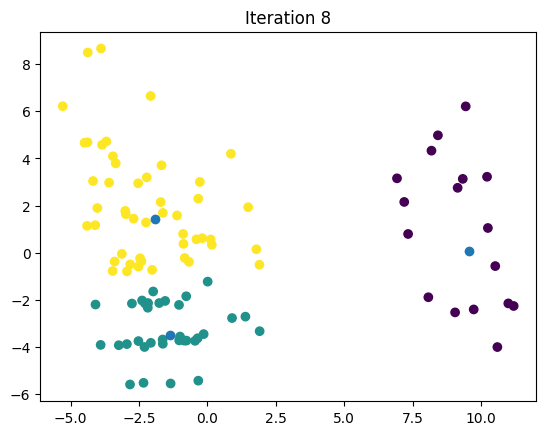

In [56]:
max_iteration = 100
centroid_count = 3

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    plot_cluster(df, labels, centroids, iteration)
    iteration += 1

In [57]:
centroids

,0,1,2
OVA,4.194219,2.441771,5.134500
POT,3.759035,2.312986,6.652186
SKI,2.449663,9.090893,8.902481
POW,2.013452,7.949926,7.996779
STATS,2.235295,9.142679,9.250518


In [58]:
labels.value_counts()

2    48
1    35
0    17
Name: count, dtype: int64

### Goalkeeper show

In [60]:
data[labels == 0][["Name"] + features] # --> GK

,Name,OVA,POT,SKI,POW,STATS
5,T. Courtois,90,90,22,50,"1,345"
13,M. ter Stegen,89,89,29,53,"1,442"
15,Alisson,89,90,32,48,"1,471"
22,Ederson,88,89,33,55,"1,588"
23,Jan Oblak,88,88,22,53,"1,393"
26,De Gea,87,87,28,47,"1,302"
28,Gregor Kobel,87,90,23,49,"1,272"
30,G. Donnarumma,87,90,24,51,"1,370"
33,Mike Maignan,87,89,36,55,"1,520"
37,Manuel Neuer,87,87,34,57,"1,502"


## Using Library

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans = KMeans(3)
kmeans.fit(df)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [65]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
OVA,7.157635,2.984127,4.865546
POT,7.517241,3.685185,4.352941
SKI,9.070711,9.023910,2.571109
POW,8.603448,7.870370,2.147059
STATS,9.482633,9.134499,2.416796
